In [1]:
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [2]:
x0, x1s, dx, x = sp.symbols('x0 x1 Delta_x x', real=True)
b, c, d, k, h, m = sp.symbols('b, c, d, k, h, m', real=True)

In [3]:
x1_rhs = (b*sp.exp(k*h) - c*sp.exp(m*h))*x0 + d*(sp.exp(m*h) - sp.exp(k*h))
sp.Eq(x1s, x1_rhs)

In [4]:
x1_lhs = x0 + dx
sp.Eq(x1s, x1_lhs)

In [5]:
sol = sp.solve(x1_lhs - x1_rhs, dx)[0]
sp.Eq(dx, sol)

In [6]:
# First order approximation in h
sp.series(x1_rhs, h, n=2)

In [7]:
sp.series(x1_rhs, h, n=2).removeO()

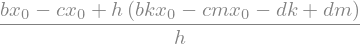

In [8]:
sp.series(x1_rhs, h, n=2).removeO()/h

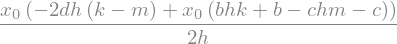

In [9]:
# x' = lim h-> (x(h) - x(0))/h
# x = integrate(x)
sp.integrate(sp.series(x1_rhs, h, n=2).removeO()/h, x0).simplify()

# Taylor Series in SymPy

SymPy exports Taylor series in a more Pythonic way with generators. The tenth order Taylor series for $sin(x)$ at zero is

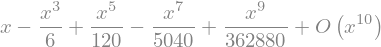

In [10]:
sp.series(sp.sin(x), x0=0, n=10)

If instead of n=10 for the order, we give None as argument, we obtain a generator:

In [11]:
g = sp.series(sp.sin(x), x0=0, n=None)
print (g, type(g))

<generator object Expr.series.<locals>.<genexpr> at 0x114d80a50> <class 'generator'>


We can use a generator with the built-in free function next to get the next term in the series.

In [13]:
print(next(g))
print(next(g))

x
-x**3/6


# Limit